# Figures 5, S3, S4, S5 and S6: Zonally-Integrated Ocean Heat Content trends

This notebook will reproduce Figure 5 from *Ocean Heat Content responses to changing Anthropogenic Aerosol Forcing Strength: regional and multi-decadal variability*, E. Boland et al. 2022 (doi to come), as well as figures S3 - S6 from the supplementary info. This will require utils.py (expects to find it in ../code) and input datafiles (expects to find them in ../data_in) to run - please see the README for details.

The data files loaded were created as follows:
- Time series of depth-integrated OHC for the SMURPHS ensemble and the pre-industrial control were generated by running ohc_yz.py and ohc_yz_pic.py
- PIC drift was calculated in ohc_yz_pic_drift.py
- 30 year trends were calculated and de-drifted, in ohc_yz_trends.py, producing ohc_yz_trend_by_run.nc

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Feb 2022 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Directories for saving plots and finding input data
figs_dir = '../figs/' # Where you want the plots saved
data_dir='../data_in/' # Where the input data is (see README)

# Experiment info, don't alter
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
exp_names=['0.2','0.4','0.7','1.0','1.5']
y_start=[1960,1980]
y_end=[1991,2011]
basins=['global','atl','pac','so','ind']
basin_name=dict(zip(basins,['Global','Atlantic','Pacific','Southern','Indian']))

# Plotting choices
clims={'so':[-12,12],
   'pac':[-14,14],
   'ind':[-6,6],
   'global':[-20,20],
   'atl':[-7,7]}
latlims={'so':[-75,-35],
          'pac':[-35,66],
          'ind':[-35,28.5],
          'global':[-75,75],
          'atl':[-35,75]}

In [3]:
ohc_yz=xr.open_dataarray(data_dir+'ohc_yz/ohc_yz_trend_byrun.nc')

## Figure 5

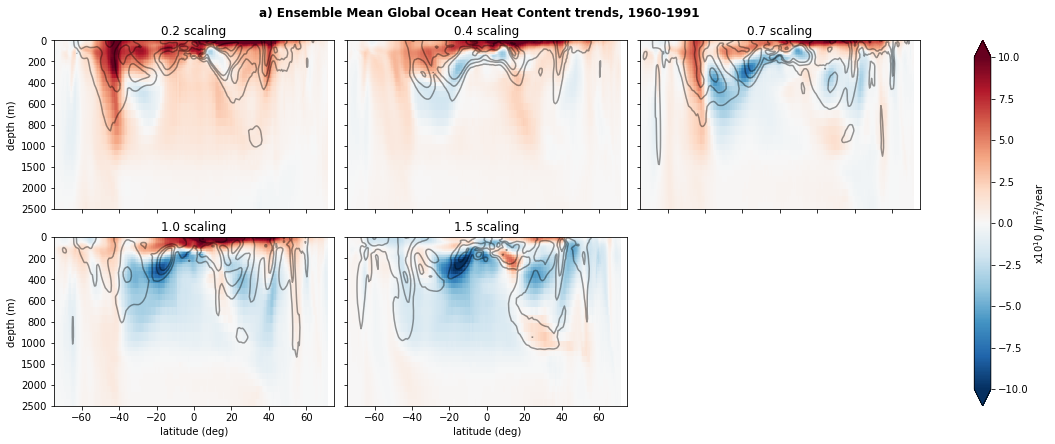

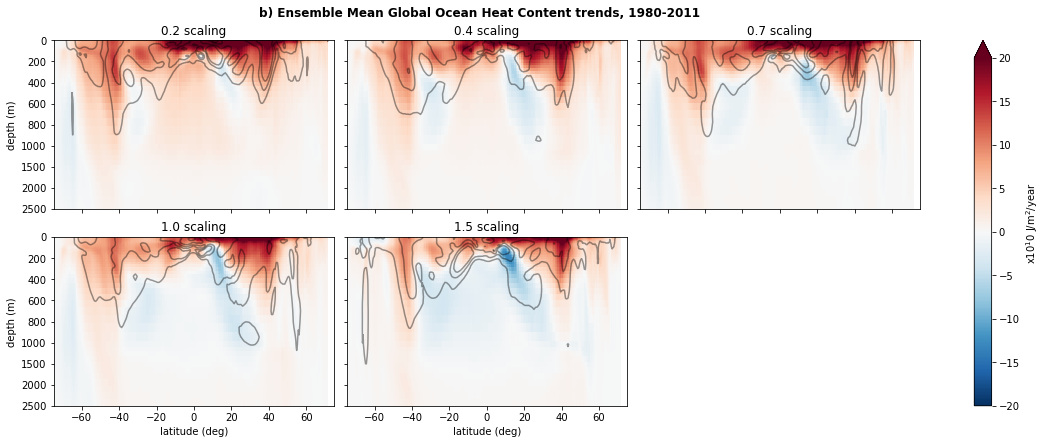

In [5]:
%matplotlib inline
basin='global'

for tchunk in range(0,2):        
    vmin=clims[basin][0]
    vmax=clims[basin][1]
    if tchunk==0:
        vmin=vmin*0.5
        vmax=vmax*0.5
    dplot=ohc_yz.isel(time=tchunk).sel(basin=basin)/1e10
    dplot['depth_alt']=xr.where(dplot['deptht']<1000,dplot['deptht']*500/200,dplot['deptht']+1500)

    dplot_mean=dplot.mean(dim='run')   
    dplot_std=dplot.std(dim='run')
    p=dplot_mean.plot(x='lat',y='depth_alt',col='exp',col_wrap=3,yincrease=False,
                           figsize=[16,6],cmap='RdBu_r',
                           vmin=vmin,vmax=vmax,
                           cbar_kwargs={'label': 'x10$^10$ J/m$^2$/year'},rasterized=True)


    for ia,ax in enumerate(p.axes.flat):
        ax.set_xlim(latlims[basin][0],latlims[basin][1])        
        ax.set_ylim([4000,0])
        plt.gca().set_yticks([4000, 3500, 3000, 2500, 2000, 1500, 1000, 500, 0])
        plt.gca().set_yticklabels([2500, 2000, 1500, 1000, 800, 600, 400, 200, 0])      
        if ia<5:   
            if tchunk==0:
                levels=[2,3.5,5]
            else:
                levels=[2,4,6]
            dplot_std.isel(exp=ia).plot.contour(x='lat',y='depth_alt',
                                                levels=levels,
                                                colors='k',alpha=0.4,ax=ax,yincrease=False)            
            ax.set(title=exp_names[ia]+' scaling')      
        if ia<3:
            ax.set(xlabel='')
        else:
            ax.set(xlabel='latitude (deg)')   
        if (ia == 0) | (ia == 3):
            ax.set(ylabel='depth (m)')
        else:
            ax.set(ylabel='')
    plt.suptitle(chr(ord('a')+tchunk)+') Ensemble Mean '+basin.capitalize()+' Ocean Heat Content trends, '+str(y_start[tchunk])+'-'+str(y_end[tchunk]),weight='bold',x=0.42,y=1.02)
    plt.savefig(figs_dir+'Fig5_OHC_yz_runmean_'+basin+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'.png',bbox_inches='tight')


## Figures S3-S6

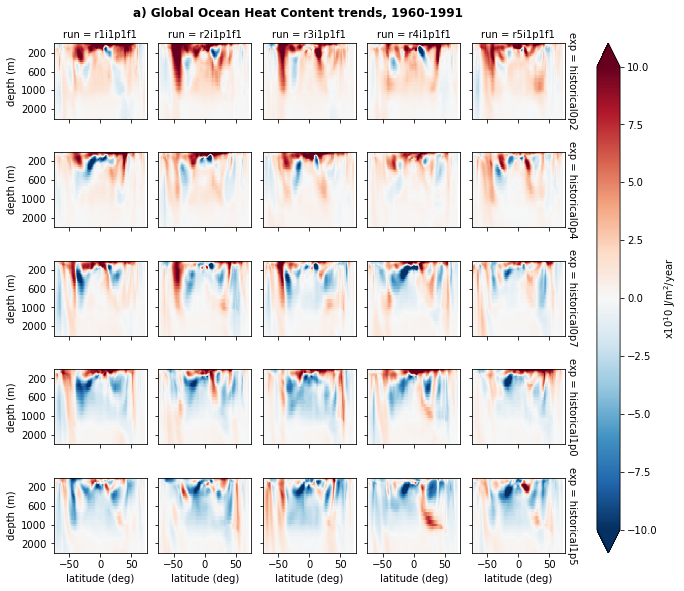

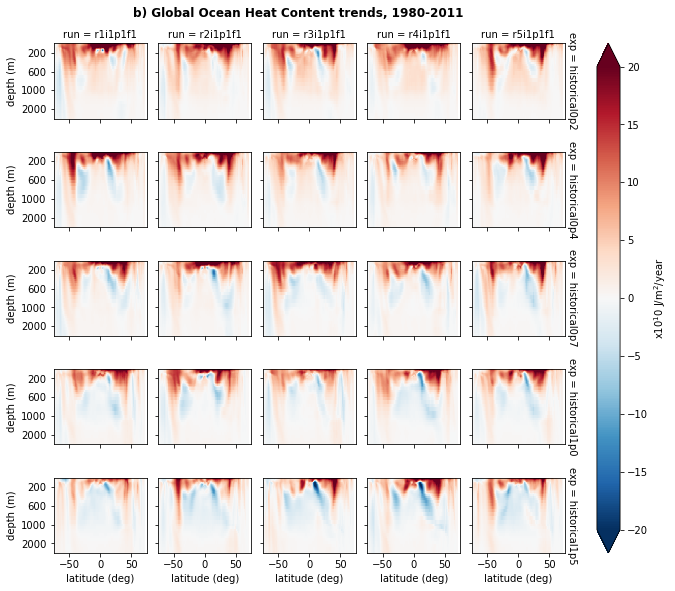

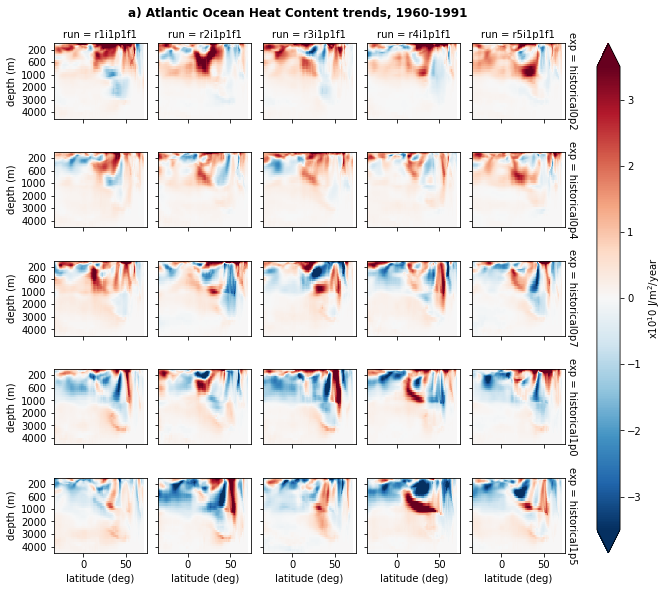

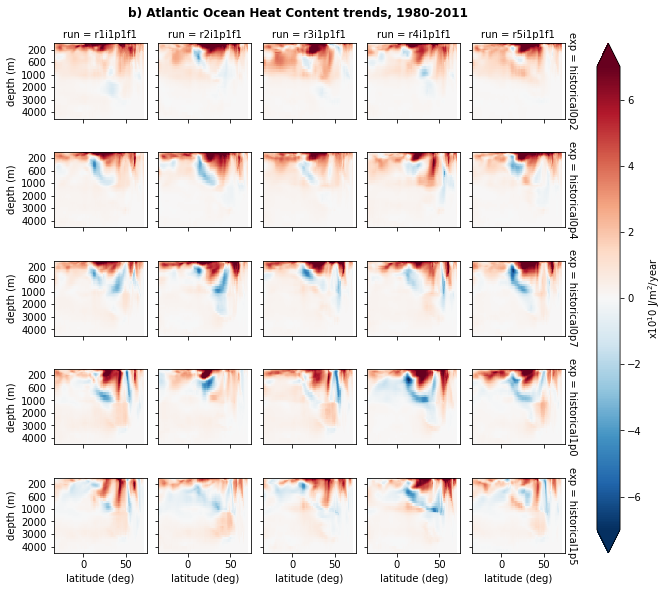

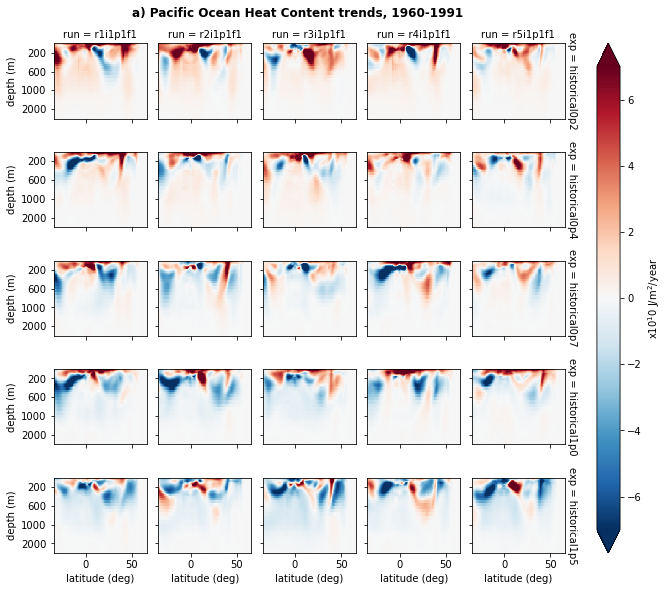

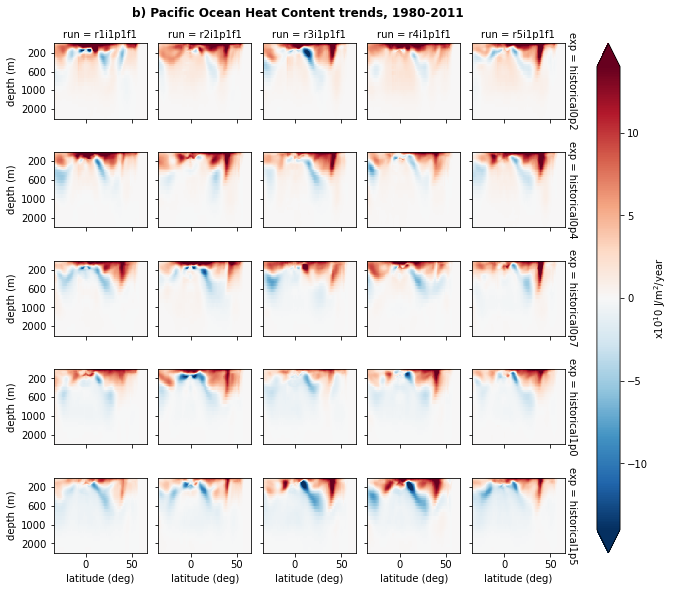

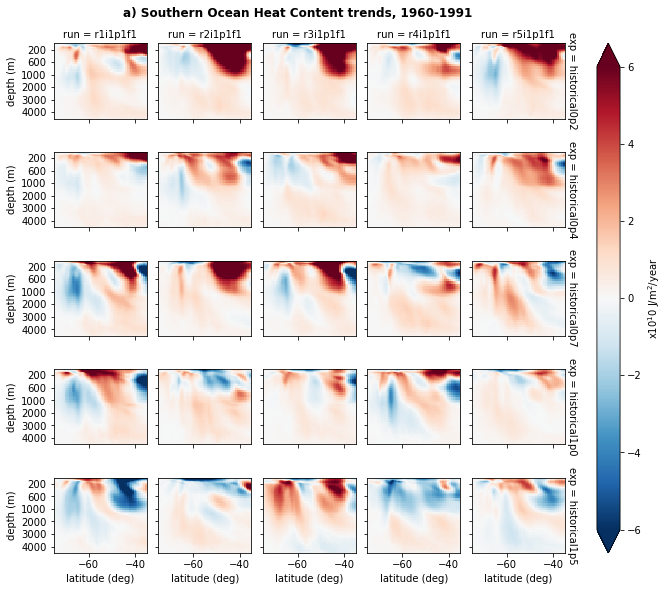

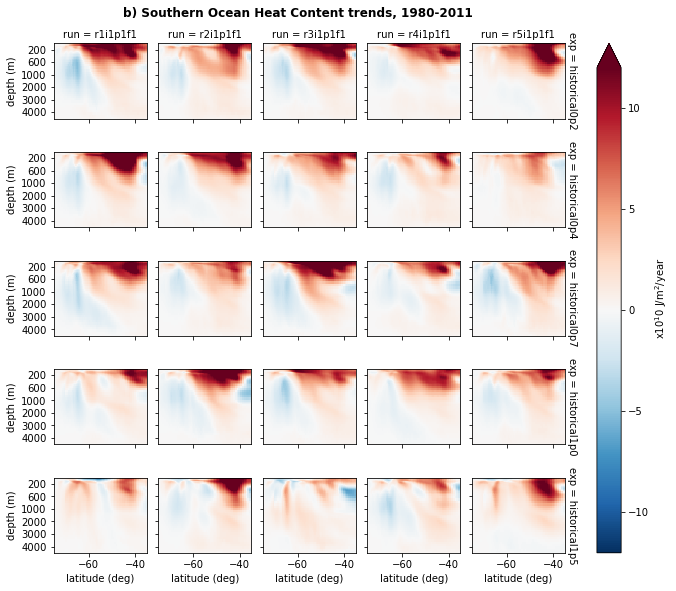

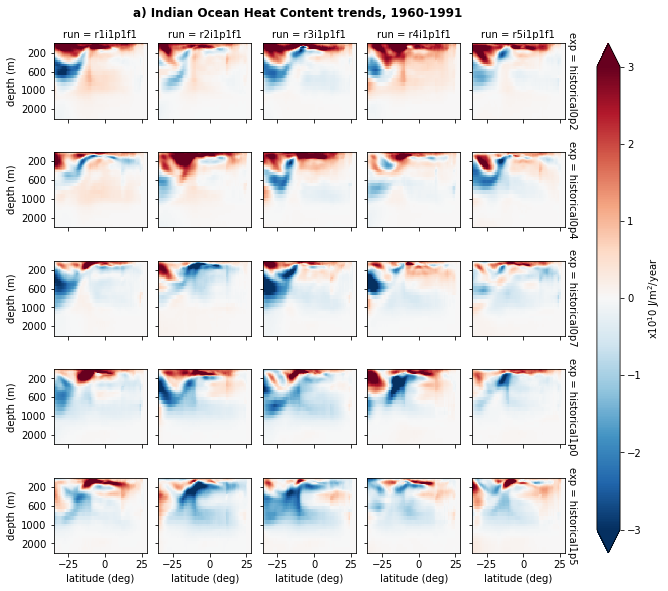

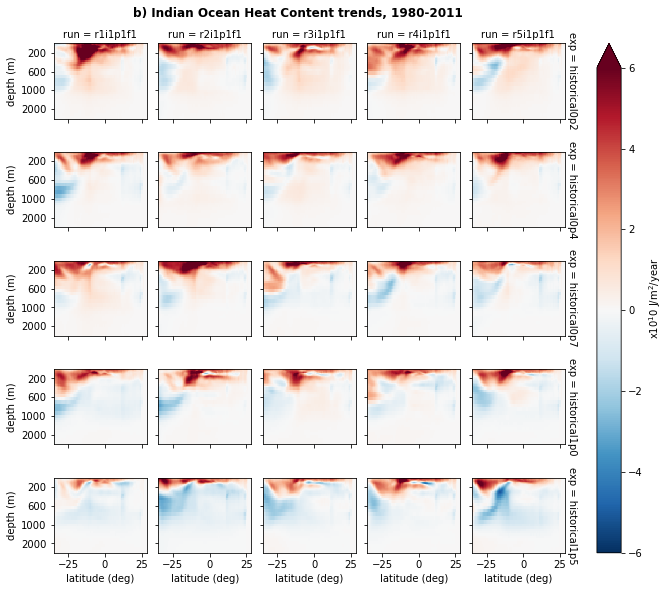

In [8]:
%matplotlib inline
for basin in basins:
    for tchunk in range(0,2):        
        vmin=clims[basin][0]
        vmax=clims[basin][1]
        if tchunk==0:
            vmin=vmin*0.5
            vmax=vmax*0.5
        dplot=ohc_yz.isel(time=tchunk).sel(basin=basin)/1e10
        dplot['depth_alt']=xr.where(dplot['deptht']<1000,dplot['deptht']*500/200,dplot['deptht']+1500)

        p=dplot.plot(x='lat',y='depth_alt',col='run',row='exp',yincrease=False,
                             figsize=[10,8],
                     cmap='RdBu_r',
                               vmin=vmin,vmax=vmax,
                               cbar_kwargs={'label': 'x10$^10$ J/m$^2$/year'},rasterized=True)


        for ia,ax in enumerate(p.axes.flat):
            ax.set_xlim(latlims[basin][0],latlims[basin][1])        
            if basin in ['atl','so']:
                ax.set_ylim([6000,0])
                plt.gca().set_yticks([5500,4500,3500, 2500,  1500,  500])
                plt.gca().set_yticklabels([4000,3000, 2000,  1000,  600, 200])      
            else:
                ax.set_ylim([4000,0])
                plt.gca().set_yticks([3500, 2500,  1500,  500])
                plt.gca().set_yticklabels([ 2000,  1000,  600, 200])      
            if ia<20:
                ax.set(xlabel='')
            else:
                ax.set(xlabel='latitude (deg)')   
            if np.mod(ia,5) == 0:
                ax.set(ylabel='depth (m)')
            else:
                ax.set(ylabel='')
        plt.suptitle(chr(ord('a')+tchunk)+') '+basin_name[basin]+' Ocean Heat Content trends, '+str(y_start[tchunk])+'-'+str(y_end[tchunk]),weight='bold',x=0.42,y=1.02)
        plt.savefig(figs_dir+'SIFig_OHC_yz_byrun_'+basin+'_'+str(y_start[tchunk])+str(y_end[tchunk])+'.png',bbox_inches='tight')